# I. Perkenalan

## Milestone 2 — AI Job Market Trends
**Nama:** Muhammad Raihan Alfain Yonanda  
**Batch:** CODA-RMT-012  

**Target audiens:** Pencari kerja **Data Scientist (DS)** & **Data Analyst (DA)**.  
**Tujuan praktis:** memberi **angka acuan gaji**, **prioritas skill**, **perusahaan/lokasi target**, dan **waktu terbaik melamar** yang berbasis data lowongan DA/DS.

Sumber: https://www.kaggle.com/datasets/abhishekjaiswal4896/ai-job-market-trends/data

Link Dashboard (Tableau) :
- Dashboard 1: https://public.tableau.com/views/DashboardMilestone2/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
- Dasboard 2: https://public.tableau.com/views/Dashboard2_Milestone/Dashboard2?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## SMART
- **Specific**: Analisis pasar kerja AI untuk job seeker Data Analyst (DA) dan Data Scientist (DS) yang mencakup tren lowongan per bulan, rentang gaji (median & P10–P90) per level pengalaman & role, top-10 skills/tools per role, serta perusahaan/negara dengan lowongan terbanyak.
- **Measurable**: Job seeker dapat mencocokkan ≥70% skills/tools yang dikuasai dengan top-10 skills/tools pada role/level target dan memperoleh ≥3 target (role/level/perusahaan/negara) yang sesuai sebagai shortlist.
- **Achievable**: Mencapai target lewat alur kerja: (1) data cleaning & standarisasi (role/level/tanggal), (2) feature engineering (mis. month_dt, salary_mid_usd), (3) QA data (duplikat/NA/outlier ringan), (4) analisis deskriptif & inferensial, (5) visualisasi + dashboard untuk rekomendasi skill/role.
- **Relevant**: Memberi panduan praktis bagi pencari kerja DA/DS untuk memilih role/level target, kisaran gaji realistis, dan 5 skill prioritas sehingga peluang lolos seleksi meningkat.
- **Time-bound**: Pengerjaan dilakukan selama 4 hari (notebook + Tableau). D1: cleaning & FE; D2: analisis; D3: visualisasi & insight; D4: dashboard & ppt.


# II. Identifikasi Masalah

**Problem statement:**

Menyusun panduan cepat bagi pencari kerja Data Analyst dan Data Scientist untuk menentukan target role, gaji realistis, prioritas skill, serta target perusahaan/lokasi dengan memanfaatkan data lowongan AI (Sep 2023 – Sep 2025).

**5W+1H**
1) Who (siapa?)

Perusahaan apa yang paling sering membuka lowongan DA dan DS?
(kolom: company_name, role)  

2) What (apa?)

Role apa yang lebih banyak dibuka: DA atau DS? Judul pekerjaan apa yang paling umum?
(role, job_title)

3) Where (di mana?)

Negara/kota mana yang paling banyak membuka lowongan DA/DS?
(location, role)

4) When (kapan?)

Bagaimana tren jumlah lowongan per bulan? Kapan puncak dan lembahnya?
(posted_date → month_dt)

5) How (bagaimana?)

Bagaimana kandidat menyusun strategi apply?

- pilih role (DA/DS) berdasarkan minat & peluang,

- set target gaji sesuai median level-nya,

- tentukan 5 skill prioritas yang paling sering diminta untuk menutup gap,

- buat daftar 10 perusahaan & 10 lokasi dengan lowongan terbanyak untuk diawali proses apply.

# III. Data Loading

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Statistik inferensial
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

pd.set_option("display.float_format", lambda x: f"{x:,.2f}")  # agar angka rapi

In [ ]:
# Sumber data
path = "/content/ai_job_market.csv"

# Baca CSV
df = pd.read_csv(path)

# Info awal
print("Shape:", df.shape)
df.head()

Shape: (2000, 12)


,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"


# IV. Data Cleaning

## 1. Cek struktur, missing values, & duplikat

In [ ]:
# Cek tipe kolom & jumlah non-null
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job_id            2000 non-null   int64 
 1   company_name      2000 non-null   object
 2   industry          2000 non-null   object
 3   job_title         2000 non-null   object
 4   skills_required   2000 non-null   object
 5   experience_level  2000 non-null   object
 6   employment_type   2000 non-null   object
 7   location          2000 non-null   object
 8   salary_range_usd  2000 non-null   object
 9   posted_date       2000 non-null   object
 10  company_size      2000 non-null   object
 11  tools_preferred   2000 non-null   object
dtypes: int64(1), object(11)
memory usage: 187.6+ KB
None


In [ ]:
# Cek persentase missing per kolom (dari data mentah)
missing_raw = df.isna().mean().sort_values(ascending=False).to_frame("missing_rate")
missing_raw.head(12)

,missing_rate
job_id,0.00
company_name,0.00
industry,0.00
job_title,0.00
skills_required,0.00
experience_level,0.00
employment_type,0.00
location,0.00
salary_range_usd,0.00
posted_date,0.00


In [ ]:
# Cek ringkas: ada duplikasi job_id atau tidak?
dup_mask = df["job_id"].duplicated(keep=False)     # True untuk baris yang duplikat (semua anggota dupe)
dup_count = int(dup_mask.sum())
print(f"Jumlah baris yang termasuk duplikat job_id: {dup_count}")
print(f"Jumlah job_id unik          : {df['job_id'].nunique()}")
print(f"Jumlah baris total           : {len(df)}")
print("Semua job_id unik?           :", df["job_id"].is_unique)

Jumlah baris yang termasuk duplikat job_id: 0
Jumlah job_id unik          : 2000
Jumlah baris total           : 2000
Semua job_id unik?           : True


In [ ]:
full_dupe = df.duplicated(keep=False).sum()
print("Full-row duplicates:", full_dupe)

Full-row duplicates: 0


In [ ]:
# Trim whitespace kolom teks inti
text_cols = ["company_name","industry","job_title","skills_required","employment_type","location","tools_preferred"]
for c in text_cols:
    df[c] = df[c].astype(str).str.strip()

# Pastikan tanggal & bantu kolom bulan
df["posted_date"] = pd.to_datetime(df["posted_date"], errors="coerce")
df["month_dt"]    = df["posted_date"].dt.to_period("M").dt.to_timestamp()

# Pecah salary_range_usd -> min/max/mid
rng = df["salary_range_usd"].str.split("-", expand=True)
df["salary_min_usd"] = pd.to_numeric(rng[0], errors="coerce")
df["salary_max_usd"] = pd.to_numeric(rng[1], errors="coerce")
df["salary_mid_usd"] = (df["salary_min_usd"] + df["salary_max_usd"]) / 2

# Normalisasi level pengalaman (mapping ke {Junior, Mid, Senior, Other})
map_level = {"Entry":"Junior","Junior":"Junior","Mid":"Mid","Senior":"Senior"}
df["experience_norm"] = df["experience_level"].map(map_level).fillna("Other")

In [ ]:
print("Missing rate per kolom (top 10):")
print(df.isna().mean().sort_values(ascending=False).head(10))

print("\nRentang tanggal:", df["posted_date"].min(), "→", df["posted_date"].max())
print("Min/Max salary_mid_usd:", float(df["salary_mid_usd"].min()), float(df["salary_mid_usd"].max()))
print("Distribusi experience_norm:")
print(df["experience_norm"].value_counts(dropna=False))

Missing rate per kolom (top 10):
job_id             0.00
company_name       0.00
industry           0.00
job_title          0.00
skills_required    0.00
experience_level   0.00
employment_type    0.00
location           0.00
salary_range_usd   0.00
posted_date        0.00
dtype: float64

Rentang tanggal: 2023-09-21 00:00:00 → 2025-09-19 00:00:00
Min/Max salary_mid_usd: 47578.5 197776.5
Distribusi experience_norm:
experience_norm
Junior    702
Mid       668
Senior    630
Name: count, dtype: int64


## 2. Parse tanggal dan membuat month_dt

In [ ]:
# Ubah posted_date ke datetime
df["posted_date"] = pd.to_datetime(df["posted_date"], errors="coerce")

# Buat kolom month_dt untuk agregasi bulanan
df["month_dt"] = df["posted_date"].dt.to_period("M").dt.to_timestamp()

print("Rentang tanggal:", df["posted_date"].min(), "→", df["posted_date"].max())
df[["posted_date","month_dt"]].head(3)

Rentang tanggal: 2023-09-21 00:00:00 → 2025-09-19 00:00:00


,posted_date,month_dt
0,2025-08-20,2025-08-01
1,2024-03-22,2024-03-01
2,2025-09-18,2025-09-01


Datetime: ubah posted_date ke datetime64[ns], buat month_dt (floor ke awal bulan) supaya tren bulanan konsisten.

## 3. Buat salary_mid_usd dari salary_range_usd

In [ ]:
# bantuan sederhana untuk ambil midpoint dari "a-b" (mendukung 60k-80k / 60,000-80,000)
def _to_num(t):
    t = str(t).replace(",","").lower().strip()
    return float(t.replace("k",""))*1000 if "k" in t else float(t)

def parse_mid(s):
    if pd.isna(s): return np.nan
    m = re.findall(r"(\d[\d,\.kK]*)", str(s))
    if len(m) >= 2:
        a, b = _to_num(m[0]), _to_num(m[1])
        return (a + b) / 2
    return np.nan

df["salary_mid_usd"] = df["salary_range_usd"].apply(parse_mid)

print("Missing rate salary_mid_usd:", df["salary_mid_usd"].isna().mean())
print(df["salary_mid_usd"].describe(percentiles=[.1,.25,.5,.75,.9]).to_string())

Missing rate salary_mid_usd: 0.0
count     2,000.00
mean    123,040.00
std      34,776.20
min      47,578.50
10%      75,909.10
25%      94,466.25
50%     123,202.75
75%     151,413.00
90%     169,213.15
max     197,776.50


Rename/feature: buat salary_min_usd, salary_max_usd, salary_mid_usd dari salary_range_usd untuk analisis numerik.

## 4. Normalisasi level pengalaman [experience_norm]

In [ ]:
# Normalisasi level pengalaman
def norm_exp(x):
    x = str(x).lower()
    if "senior" in x:  return "Senior"
    if "mid"    in x:  return "Mid"
    if "junior" in x or "entry" in x: return "Junior"
    return "Other"

df["experience_norm"] = df["experience_level"].astype(str).apply(norm_exp)

# Lihat distribusi setelah dinormalisasi
df["experience_norm"].value_counts(dropna=False)

,count
experience_norm,
Junior,702
Mid,668
Senior,630


 experience_norm ∈ {Junior, Mid, Senior, Other}, role ∈ {Data Analyst, Data Scientist, NaN}.

## 5. Standarisasi judul dan membuat role (fokus Data Analyst / Data Scientist)

In [ ]:
def std_title(s):
    return re.sub(r"\s+"," ", str(s).lower().strip())

def classify_role(t):
    if pd.isna(t): return np.nan
    if re.search(r"\bdata\s+analyst\b", t):   return "Data Analyst"
    if re.search(r"\bdata\s+scientist\b", t): return "Data Scientist"
    return np.nan   # role lain diabaikan agar fokus ke DA/DS

df["job_title_std"] = df["job_title"].apply(std_title)
df["role"] = df["job_title_std"].apply(classify_role)

# Cek hasil
df["role"].value_counts(dropna=False)

,count
role,
NaN,1491
Data Analyst,271
Data Scientist,238


Standarisasi label: mapping experience_level → experience_norm (Junior/Mid/Senior/Other) dan normalisasi job_title → job_title_std + role (fokus DA/DS).

## 6. Normalisasi Teks

In [ ]:
# Split Skills sederhana: turunkan huruf, samakan pemisah, split, buang kosong
def split_simple(s):
    s = str(s).lower()
    for sep in [";", "/", "|"]:
        s = s.replace(sep, ",")
    s = s.replace(" and ", ",")
    toks = [t.strip() for t in s.split(",") if t.strip()]
    alias = {"ms excel":"excel","microsoft excel":"excel","sklearn":"scikit-learn","tf":"tensorflow","py torch":"pytorch","powerbi":"power bi"}
    toks = [alias.get(t, t) for t in toks]
    # unik per baris
    return list(dict.fromkeys(toks))

df["skills_list"]  = df["skills_required"].apply(split_simple)
df["skill_count"]  = df["skills_list"].apply(len)

# QA cepat: tampilkan 12 skill teratas
from collections import Counter
flat = [t for row in df["skills_list"] for t in row]
Counter(flat).most_common(12)

[('tensorflow', 452),
 ('excel', 432),
 ('pandas', 427),
 ('fastapi', 419),
 ('numpy', 416),
 ('reinforcement learning', 414),
 ('azure', 413),
 ('sql', 408),
 ('hugging face', 408),
 ('keras', 406),
 ('gcp', 404),
 ('aws', 404)]

Text cleaning: trim + lower skill/tools; satukan variasi ejaan umum (mis. scikit-learn/sklearn → scikit-learn, MLFlow/mlflow → mlflow).

In [ ]:
added = ["month_dt","salary_mid_usd","experience_norm","job_title_std","role","skills_list","skill_count"]
print("Kolom baru:", [c for c in added if c in df.columns])
df.loc[:, ["posted_date","month_dt","salary_range_usd","salary_mid_usd",
           "experience_level","experience_norm","job_title","role","skill_count"]].head()

Kolom baru: ['month_dt', 'salary_mid_usd', 'experience_norm', 'job_title_std', 'role', 'skills_list', 'skill_count']


,posted_date,month_dt,salary_range_usd,salary_mid_usd,experience_level,experience_norm,job_title,role,skill_count
0,2025-08-20,2025-08-01,92860-109598,"101,229.00",Mid,Mid,Data Analyst,Data Analyst,6
1,2024-03-22,2024-03-01,78523-144875,"111,699.00",Senior,Senior,Computer Vision Engineer,NaN,4
2,2025-09-18,2025-09-01,124496-217204,"170,850.00",Entry,Junior,Quant Researcher,NaN,6
3,2024-05-08,2024-05-01,50908-123743,"87,325.50",Mid,Mid,AI Product Manager,NaN,6
4,2025-02-24,2025-02-01,98694-135413,"117,053.50",Senior,Senior,Data Scientist,Data Scientist,4


In [ ]:
df.head(10)

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,...,tools_preferred,month_dt,salary_min_usd,salary_max_usd,salary_mid_usd,experience_norm,job_title_std,role,skills_list,skill_count
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,...,"KDB+, LangChain",2025-08-01,92860,109598,"101,229.00",Mid,data analyst,Data Analyst,"[numpy, reinforcement learning, pytorch, sciki...",6
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,...,"FastAPI, KDB+, TensorFlow",2024-03-01,78523,144875,"111,699.00",Senior,computer vision engineer,NaN,"[scikit-learn, cuda, sql, pandas]",4
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,...,"BigQuery, PyTorch, Scikit-learn",2025-09-01,124496,217204,"170,850.00",Junior,quant researcher,NaN,"[mlflow, fastapi, azure, pytorch, sql, gcp]",6
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,...,"TensorFlow, BigQuery, MLflow",2024-05-01,50908,123743,"87,325.50",Mid,ai product manager,NaN,"[scikit-learn, c++, pandas, langchain, aws, r]",6
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,...,"PyTorch, LangChain",2025-02-01,98694,135413,"117,053.50",Senior,data scientist,Data Scientist,"[excel, keras, sql, hugging face]",4
5,6,Ellis PLC,E-commerce,AI Product Manager,"GCP, Excel, Scikit-learn, MLflow",Senior,Remote,"South Kevin, TZ",92632-180718,2025-08-07,...,"PyTorch, TensorFlow, FastAPI",2025-08-01,92632,180718,"136,675.00",Senior,ai product manager,NaN,"[gcp, excel, scikit-learn, mlflow]",4
6,7,Matthews-Moses,Automotive,Data Analyst,"Python, Flask, Scikit-learn, GCP",Mid,Full-time,"West Shawn, LR",70575-88594,2024-12-23,...,"PyTorch, MLflow",2024-12-01,70575,88594,"79,584.50",Mid,data analyst,Data Analyst,"[python, flask, scikit-learn, gcp]",4
7,8,Mullins Ltd,Education,Data Scientist,"Excel, SQL, Flask",Entry,Internship,"Port Hailey, RU",63032-82144,2024-08-14,...,BigQuery,2024-08-01,63032,82144,"72,588.00",Junior,data scientist,Data Scientist,"[excel, sql, flask]",3
8,9,Aguilar PLC,Healthcare,ML Engineer,"Pandas, LangChain, GCP, Azure",Entry,Internship,"Butlermouth, GB",134239-188504,2025-09-15,...,"Scikit-learn, LangChain, BigQuery",2025-09-01,134239,188504,"161,371.50",Junior,ml engineer,NaN,"[pandas, langchain, gcp, azure]",4
9,10,Parks LLC,Automotive,Computer Vision Engineer,"Excel, Reinforcement Learning, TensorFlow",Senior,Full-time,"Nicoleshire, BA",79361-165029,2025-08-07,...,"MLflow, TensorFlow",2025-08-01,79361,165029,"122,195.00",Senior,computer vision engineer,NaN,"[excel, reinforcement learning, tensorflow]",3


# V. Analisis dan perhitungan

## 1. Statistik deskriptif

In [ ]:
# Statistik deskriptif gaji (overall)
desc = df["salary_mid_usd"].describe(percentiles=[.10,.25,.50,.75,.90])
iqr  = desc["75%"] - desc["25%"]
print("== Descriptive – Salary overall ==")
print(desc.to_string())
print(f"IQR: {iqr:,.0f}")

== Descriptive – Salary overall ==
count     2,000.00
mean    123,040.00
std      34,776.20
min      47,578.50
10%      75,909.10
25%      94,466.25
50%     123,202.75
75%     151,413.00
90%     169,213.15
max     197,776.50
IQR: 56,947


In [ ]:
# 95% CI mean (normal approx)
import numpy as np
m = df["salary_mid_usd"].mean()
se = df["salary_mid_usd"].std(ddof=1)/np.sqrt(len(df))
print(f"Mean={m:,.0f} USD, 95% CI [{m-1.96*se:,.0f}, {m+1.96*se:,.0f}]")

# Bootstrap 95% CI median
rng = np.random.default_rng(42)
boots = [df["salary_mid_usd"].sample(frac=1, replace=True, random_state=int(rng.integers(1e9))).median()
         for _ in range(200)]
print(f"Median≈{df['salary_mid_usd'].median():,.0f}, 95% CI [{np.percentile(boots,2.5):,.0f}, {np.percentile(boots,97.5):,.0f}]")

Mean=123,040 USD, 95% CI [121,516, 124,564]
Median≈123,203, 95% CI [120,902, 125,699]


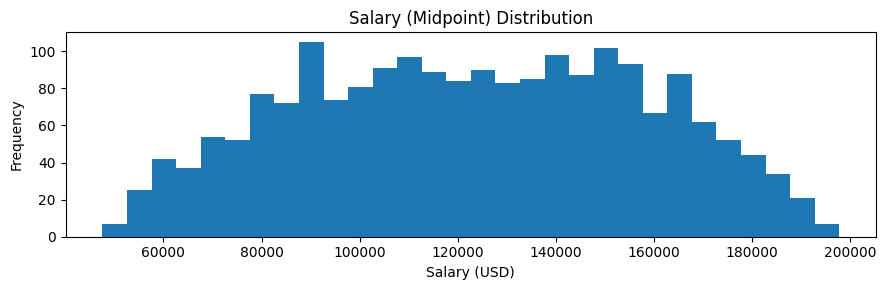

In [ ]:
# Histogram distribusi gaji
plt.figure(figsize=(9,3))
df["salary_mid_usd"].dropna().plot(kind="hist", bins=30)
plt.title("Salary (Midpoint) Distribution")
plt.xlabel("Salary (USD)"); plt.ylabel("Frequency")
plt.tight_layout(); plt.show()

Insight:

- Median = $123.2K dan mean = $123.0K ⇒ pusat distribusi ada di sekitar $123K (mean ~ median, jadi tidak terlalu miring).

- IQR = $56.9K ⇒ 50% lowongan berada di $94.5K - $151.4K. Ini rentang “pasar” yang realistis untuk negosiasi.

- P10 – P90 ≈ $75.9K – $169.2K ⇒ 80% lowongan ada di rentang luas ini; variasi cukup besar antar-iklan/perusahaan.

- Min ≈ $47.6K dan Max ≈ $197.8K ⇒ ada lowongan entry-level rendah dan senior sangat tinggi, namun mayoritas terkonsentrasi di $110K - $160K (terlihat dari histogram).

- Histogram menunjukkan sedikit right-skew (ekor ke gaji tinggi), tapi karena mean≈median, kemiringannya ringan.

## 2. Salary by Experience

In [ ]:
# Statistik gaji per level pengalaman
order = pd.CategoricalDtype(["Junior","Mid","Senior","Other"], ordered=True)

stat_exp = (df.assign(experience_norm=df["experience_norm"].astype(order))
              .groupby("experience_norm")["salary_mid_usd"]
              .agg(n="size",
                   mean="mean",
                   median="median",
                   p10=lambda s: s.quantile(.10),
                   p90=lambda s: s.quantile(.90))
              .reset_index()
              .sort_values("experience_norm"))

stat_exp

/tmp/ipython-input-2603335647.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("experience_norm")["salary_mid_usd"]


,experience_norm,n,mean,median,p10,p90
0,Junior,702,"123,404.26","123,638.25","77,154.80","168,280.95"
1,Mid,668,"121,441.44","120,882.00","75,794.15","169,819.30"
2,Senior,630,"124,329.10","125,470.25","75,516.30","170,113.05"
3,Other,0,NaN,NaN,NaN,NaN


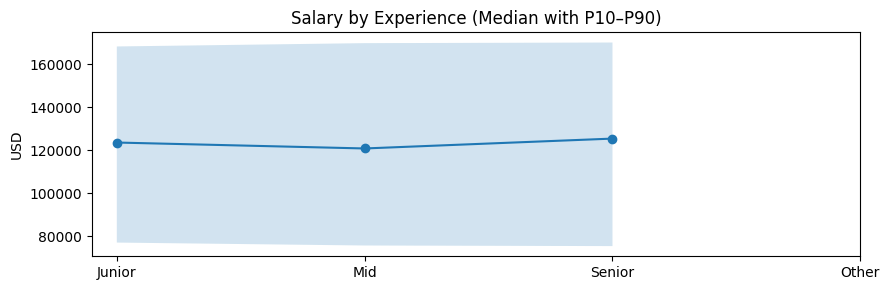

In [ ]:
# Visual: median + band P10–P90 per level
x = np.arange(len(stat_exp))
plt.figure(figsize=(9,3))
plt.plot(x, stat_exp["median"], marker="o")
plt.fill_between(x, stat_exp["p10"], stat_exp["p90"], alpha=0.2)
plt.xticks(x, stat_exp["experience_norm"])
plt.title("Salary by Experience (Median with P10–P90)")
plt.ylabel("USD"); plt.tight_layout(); plt.show()

Insight:

- Median gaji per level (n ≈ seimbang: Junior 702, Mid 668, Senior 630):

- Junior ~ $123.6 usd, Mid ~ 120.9k usd, Senior ~ 125.5k usd.

- Pola relatif flat dan sedikit non-monotonic (Mid < Junior). Selisihnya kecil ($2–3k), jadi kemungkinan besar dipengaruhi komposisi job_title/lokasi/industri, bukan murni level pengalaman.

- Sebaran: P10 ~ 75k usd dan P90 ~ 170k usd hampir sama di semua level ⇒ overlap besar antar level. Hanya pengalaman saja kurang kuat menjelaskan variasi gaji tanpa kontrol faktor lain (role/ job_title, lokasi, industri).

- Baris “Other” = 0 baris → aman untuk diabaikan pada visual.

In [ ]:
# helper: bootstrap CI untuk median
def bootstrap_median_ci(x, n_boot=2000, alpha=0.05, random_state=42):
    """
    Mengembalikan (ci_low, ci_high) untuk median dari x (array-like)
    menggunakan bootstrap persentil.
    """
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    if x.size == 0:
        return np.nan, np.nan

    rng = np.random.default_rng(random_state)
    n = x.size
    boots = np.empty(n_boot, dtype=float)
    for b in range(n_boot):
        sample = rng.choice(x, size=n, replace=True)
        boots[b] = np.median(sample)
    lo = np.percentile(boots, 100*alpha/2)
    hi = np.percentile(boots, 100*(1 - alpha/2))
    return float(lo), float(hi)

In [ ]:
# Ringkasan gaji per role: median + CI + P10–P90
def summarize_salary_by(group_series):
    """
    group_series = df.groupby(key)["salary_mid_usd"]
    Menghasilkan ringkasan: n, median, p10, p90, ci_low, ci_high
    """
    rows = []
    for key, s in group_series:
        vals = s.dropna().to_numpy(dtype=float)
        n = vals.size
        if n == 0:
            rows.ppend([key, n, np.nan, np.nan, np.nan, np.nan, np.nan])
            continue
        med = float(np.median(vals))
        p10 = float(np.quantile(vals, 0.10))
        p90 = float(np.quantile(vals, 0.90))
        ci_lo, ci_hi = bootstrap_median_ci(vals, n_boot=2000, alpha=0.05)
        rows.append([key, n, med, p10, p90, ci_lo, ci_hi])
    out = pd.DataFrame(rows, columns=["group","n","median","p10","p90","ci_low","ci_high"])
    return out

# fokus role (opsional): Data Analyst vs Data Scientist
roles_interest = ["Data Analyst", "Data Scientist"]
df_role = df[df["role"].isin(roles_interest)].copy()

by_role = summarize_salary_by(df_role.groupby("role")["salary_mid_usd"])\
            .sort_values("median", ascending=False)
by_role

,group,n,median,p10,p90,ci_low,ci_high
0,Data Analyst,271,"124,758.50","78,404.50","173,965.50","118,939.38","132,436.50"
1,Data Scientist,238,"123,278.25","80,236.50","168,233.75","115,403.74","130,925.20"


In [ ]:
# urutan level supaya rapi di tabel/plot
order_exp = pd.CategoricalDtype(["Junior","Mid","Senior","Other"], ordered=True)
df_role["experience_norm"] = df_role["experience_norm"].astype(order_exp)

by_role_exp = summarize_salary_by(
    df_role.groupby(["role","experience_norm"])["salary_mid_usd"]
).sort_values(["group"], ascending=True)  # "group" adalah tuple (role, level)
by_role_exp

/tmp/ipython-input-3395391329.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_role.groupby(["role","experience_norm"])["salary_mid_usd"]


,group,n,median,p10,p90,ci_low,ci_high
0,"(Data Analyst, Junior)",106,"138,203.25","73,290.00","178,350.75","120,121.75","147,926.50"
1,"(Data Analyst, Mid)",78,"119,756.50","80,706.00","172,741.80","106,947.21","128,034.50"
2,"(Data Analyst, Senior)",87,"123,939.00","77,944.60","167,985.50","111,778.00","132,436.50"
3,"(Data Scientist, Junior)",85,"122,116.00","86,327.80","165,448.60","112,967.50","136,601.00"
4,"(Data Scientist, Mid)",69,"125,687.00","82,685.90","168,186.00","115,116.50","138,795.00"
5,"(Data Scientist, Senior)",84,"122,323.25","72,652.65","172,295.55","110,694.75","132,429.78"


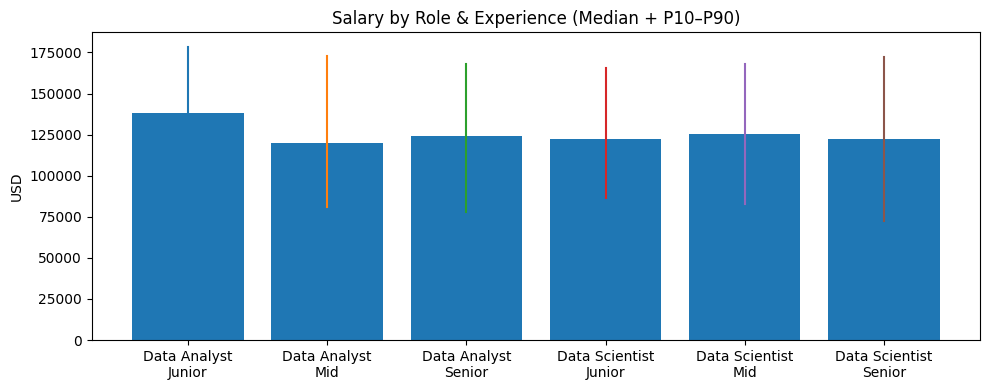

In [ ]:
# Plot: band P10–P90 + median (per pasangan role×level)
pairs = by_role_exp["group"].tolist()
labels = [f"{r}\n{lv}" for (r, lv) in pairs]

plt.figure(figsize=(10,4))
x = np.arange(len(pairs))
med = by_role_exp["median"].to_numpy()
p10 = by_role_exp["p10"].to_numpy()
p90 = by_role_exp["p90"].to_numpy()

# batang di median
plt.bar(x, med)

# garis P10–P90 di atas setiap batang
for i in range(len(x)):
    plt.plot([x[i], x[i]], [p10[i], p90[i]])

plt.xticks(x, labels, rotation=0)
plt.ylabel("USD")
plt.title("Salary by Role & Experience (Median + P10–P90)")
plt.tight_layout()
plt.show()

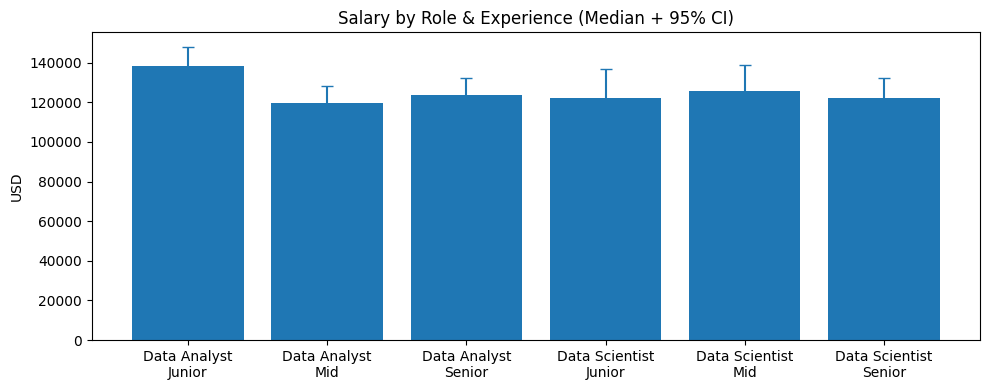

In [ ]:
plt.figure(figsize=(10,4))
x = np.arange(len(pairs))
y = by_role_exp["median"].to_numpy()
yerr = np.vstack([y - by_role_exp["ci_low"].to_numpy(),
                  by_role_exp["ci_high"].to_numpy() - y])

plt.bar(x, y)
plt.errorbar(x, y, yerr=yerr, fmt="none", capsize=4)
plt.xticks(x, labels)
plt.ylabel("USD")
plt.title("Salary by Role & Experience (Median + 95% CI)")
plt.tight_layout()
plt.show()

## 3. Tren jumlah posting per bulan

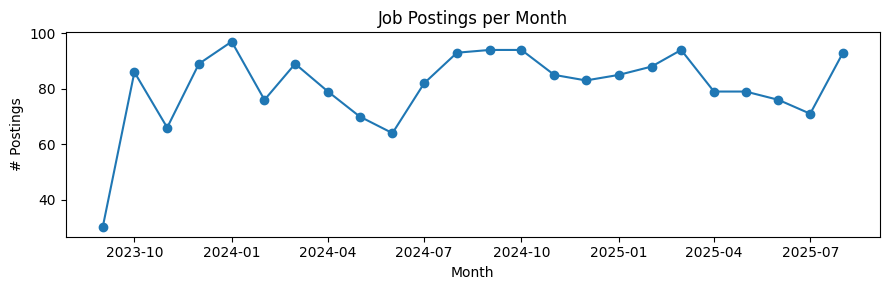

In [ ]:
#Tren jumlah posting per bulan
# Singkirkan bulan terakhir yang belum lengkap
last_full_month = df["posted_date"].max().to_period("M").to_timestamp()
m = (df.groupby("month_dt").size().rename("postings").reset_index())
m_full = m[m["month_dt"] < last_full_month]

plt.figure(figsize=(9,3))
plt.plot(m_full["month_dt"], m_full["postings"], marker="o")
plt.title("Job Postings per Month")
plt.xlabel("Month"); plt.ylabel("# Postings")
plt.tight_layout(); plt.show()

Insight:

- Volume lowongan fluktuatif, berada di kisaran ~60–100 posting/bulan.

- Terlihat puncak di awal tahun (sekitar Jan–Feb 2024) dan satu lagi di awal Q2 2025 (sekitar Mar–Apr).

- Ada fase lebih lesu di mid-2025 (sekitar Jun–Aug), lalu rebound di bulan berikutnya.

- Bulan pertama di deret (2023-10) tampak rendah hal itu wajar karena hanya sebagian bulan yang terekam pada awal rentang data.

In [ ]:
# Tabel puncak, lembah, dan MoM
m = (df.groupby("month_dt").size().rename("postings").reset_index())
last_full_month = df["posted_date"].max().to_period("M").to_timestamp()
m_full = m[m["month_dt"] < last_full_month].copy()

# MoM absolute & %
m_full["mom"] = m_full["postings"].diff()
m_full["mom_pct"] = m_full["postings"].pct_change()*100

peak  = m_full.loc[m_full["postings"].idxmax()]
trough = m_full.loc[m_full["postings"].idxmin()]

print("Peak :", peak["month_dt"].date(), int(peak["postings"]))
print("Trough:", trough["month_dt"].date(), int(trough["postings"]))
m_full.tail(6)  # lihat perubahan terbaru

Peak : 2024-01-01 97
Trough: 2023-09-01 30


,month_dt,postings,mom,mom_pct
18,2025-03-01,94,6.00,6.82
19,2025-04-01,79,-15.00,-15.96
20,2025-05-01,79,0.00,0.00
21,2025-06-01,76,-3.00,-3.80
22,2025-07-01,71,-5.00,-6.58
23,2025-08-01,93,22.00,30.99


Insight:
- Peak: 2024-01 dengan 97 posting.

- Trough: 2023-09 dengan 30 posting.

- Perkembangan terbaru (tail): Mar→Apr 2025 -15.96%, Apr→Mei 0%, Mei→Jun -3.80%, Jun→Jul -6.58%, Jul→Agu +30.99% => ada rebound kuat di Agustus setelah 3 bulan melemah.

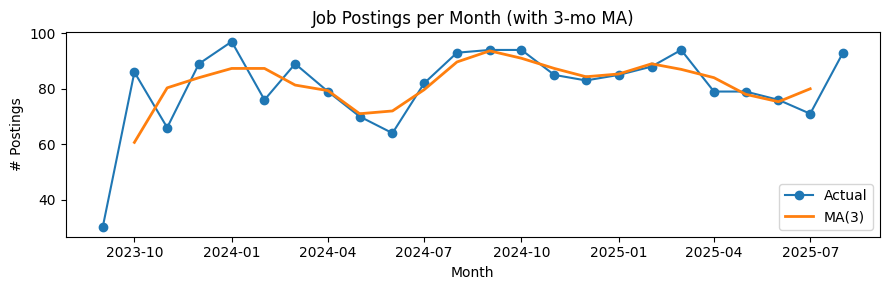

In [ ]:
# Posting per month (3-bulan)
m_full["ma3"] = m_full["postings"].rolling(3, center=True).mean()

plt.figure(figsize=(9,3))
plt.plot(m_full["month_dt"], m_full["postings"], marker="o", label="Actual")
plt.plot(m_full["month_dt"], m_full["ma3"], linewidth=2, label="MA(3)")
plt.title("Job Postings per Month (with 3-mo MA)")
plt.xlabel("Month"); plt.ylabel("# Postings"); plt.legend()
plt.tight_layout(); plt.show()

Insight:

MA(3) membuat gelombang lebih jelas saat kenaikan di awal tahun, sedikit penurunan pertengahan tahun, lalu naik lagi sehingga terlihat pola musiman ringan.

In [ ]:
# Cek tren linear sederhana (signifikan atau tidak)
m_full["t"] = range(len(m_full))
import statsmodels.api as sm
X = sm.add_constant(m_full["t"])
model = sm.OLS(m_full["postings"], X).fit()
print(model.summary().tables[1])  # lihat koefisien 't' dan p-value

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.9467      5.511     13.417      0.000      62.517      85.376
t              0.6061      0.411      1.476      0.154      -0.245       1.458


Insight:
- Koefisien waktu t = 0.606 (+0.6 posting/bulan) dengan p = 0.154 dan CI 95% [-0.245, 1.458] ⇒ tidak signifikan.
- Artinya secara garis besar tidak ada tren naik/turun linear yang kuat; fluktuasi lebih didorong musim/siklus pendek di sekitar baseline (konstanta = 74 posting/bulan).

Implikasi Untuk Job Seeker:

Momentum cenderung ramai di awal tahun dan kadang rebound di Q3/Q4. Tingkatkan intensitas aplikasi dan networking di periode-periode tersebut

## 4. Data Analyst (DA) vs Data Science (DS)

In [ ]:
# Fokus DA vs DS
df_da_ds = df[df["role"].isin(["Data Analyst","Data Scientist"])].copy()
df_da_ds["role"].value_counts()

,count
role,
Data Analyst,271
Data Scientist,238


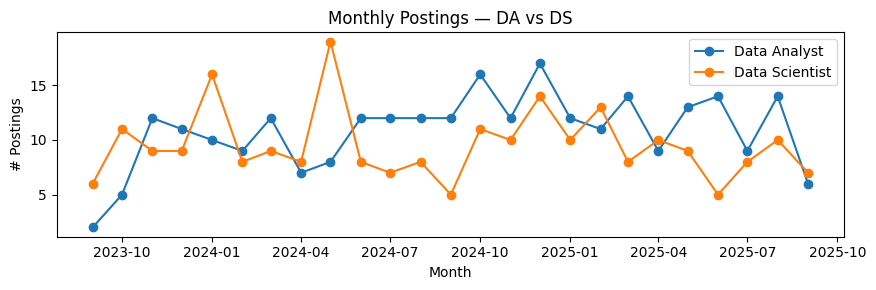

In [ ]:
# Tren bulanan DA vs DS
mrole = (df_da_ds.groupby(["month_dt","role"]).size()
           .rename("postings").reset_index())

plt.figure(figsize=(9,3))
for r, sub in mrole.groupby("role"):
    plt.plot(sub["month_dt"], sub["postings"], marker="o", label=r)
plt.title("Monthly Postings — DA vs DS")
plt.xlabel("Month"); plt.ylabel("# Postings"); plt.legend()
plt.tight_layout(); plt.show()

Insight:
- DA lebih stabil di rentang 8–17 posting/bulan, DS lebih volatil dengan spike besar (Apr 2024) dan drop (Mei–Jun 2025).

- Keduanya bergerak sideways (tidak ada tren linear kuat), selaras dengan hasil OLS sebelumnya

In [ ]:
# Statistik gaji DA vs DS per level pengalaman
stat_role_exp = (df_da_ds
   .groupby(["role","experience_norm"])["salary_mid_usd"]
   .agg(n="size", mean="mean", median="median",
        p10=lambda s: s.quantile(.10),
        p90=lambda s: s.quantile(.90))
   .reset_index())
stat_role_exp

,role,experience_norm,n,mean,median,p10,p90
0,Data Analyst,Junior,106,"129,839.19","138,203.25","73,290.00","178,350.75"
1,Data Analyst,Mid,78,"123,297.40","119,756.50","80,706.00","172,741.80"
2,Data Analyst,Senior,87,"120,946.35","123,939.00","77,944.60","167,985.50"
3,Data Scientist,Junior,85,"122,877.18","122,116.00","86,327.80","165,448.60"
4,Data Scientist,Mid,69,"125,815.67","125,687.00","82,685.90","168,186.00"
5,Data Scientist,Senior,84,"122,084.43","122,323.25","72,652.65","172,295.55"


Insight:
- Junior: median DA > DS ($16k). Menariknya, P10 DS > P10 DA → level bawah gaji junior DS lebih tinggi, tetapi ekor atas DA lebih tebal sehingga median DA naik.

- Mid: median DS > DA ($6k). DS mulai unggul di level menengah.

- Senior: terlihat hampir mirip (selisih $1.6k sehingga masih kecil).

- Overlap P10–P90 besar di semua level berarti pengalaman saja belum menjelaskan variasi; kemungkinan faktor job title detail / industri / lokasi ikut berpengaruh.

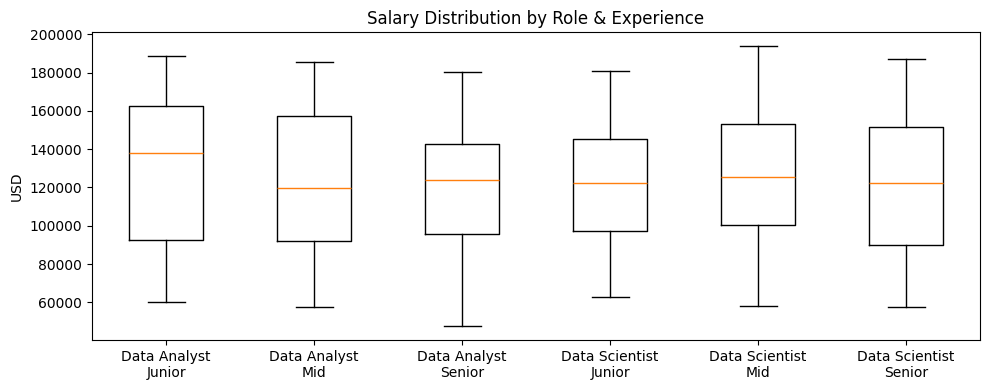

In [ ]:
# Boxplot per role–level (variasi visual)
plt.figure(figsize=(10,4))
data = df[df["role"].isin(["Data Analyst","Data Scientist"]) &
          df["experience_norm"].isin(["Junior","Mid","Senior"])]

pairs = [("Data Analyst","Junior"),("Data Analyst","Mid"),("Data Analyst","Senior"),
         ("Data Scientist","Junior"),("Data Scientist","Mid"),("Data Scientist","Senior")]

xlabels, boxdata = [], []
for r,l in pairs:
    sub = data[(data["role"]==r) & (data["experience_norm"]==l)]["salary_mid_usd"]
    if len(sub)>0:
        xlabels.append(f"{r}\n{l}")
        boxdata.append(sub)

plt.boxplot(boxdata, showfliers=False)
plt.xticks(range(1,len(xlabels)+1), xlabels, rotation=0)
plt.ylabel("USD")
plt.title("Salary Distribution by Role & Experience")
plt.tight_layout(); plt.show()

Insight:

- Median: DA-Junior terlihat paling tinggi ($138k) dibanding DA-Mid (120k) dan DA-Senior (124k). DS-Mid sedikit di atas DS-Junior/Senior (semuanya = 122-126k).

- Sebaran (IQR & whisker): semua grup punya rentang tipikal (IQR) yang cukup lebar dan whisker menyentuh ≈ $180–190k, artinya ada peluang gaji tinggi di kedua role.

- Overlap antar grup besar → perbedaan gaji tidak murni dijelaskan oleh level pengalaman saja; kemungkinan job title detail, industri, dan lokasi berperan besar.

- Tidak selalu naik dari Junior→Mid→Senior (terutama DA). Ini mengindikasikan komposisi lowongan di tiap level berbeda (misal, banyak DA-Junior di industri/lokasi high-pay).

## 5. Top skills per role (DA & DS)

In [ ]:
from collections import Counter

def top_skills_for(role, topn=12):
    toks = [t for row in df_da_ds.loc[df_da_ds["role"]==role, "skills_list"] for t in row]
    vc = Counter(toks)
    return pd.DataFrame(vc.most_common(topn), columns=["skill","count"])

top_da = top_skills_for("Data Analyst", 12)
top_ds = top_skills_for("Data Scientist", 12)
display(top_da); display(top_ds)

,skill,count
0,tensorflow,71
1,excel,69
2,reinforcement learning,67
3,mlflow,65
4,pytorch,63
5,power bi,61
6,gcp,60
7,pandas,60
8,keras,57
9,scikit-learn,56


,skill,count
0,reinforcement learning,63
1,pandas,59
2,aws,56
3,c++,56
4,flask,55
5,scikit-learn,54
6,azure,53
7,excel,51
8,fastapi,51
9,python,49


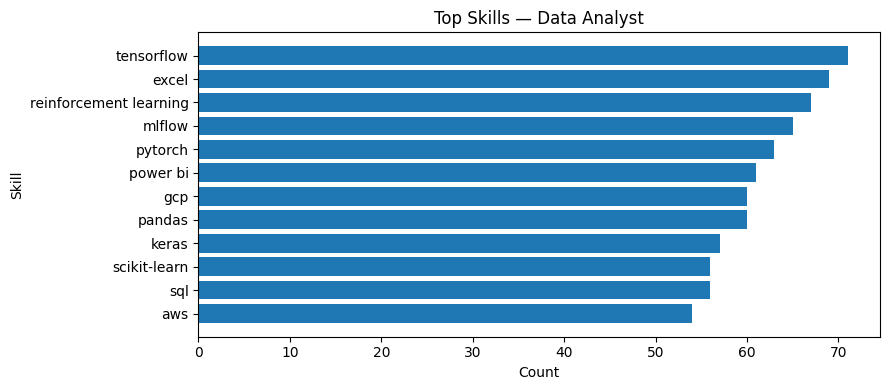

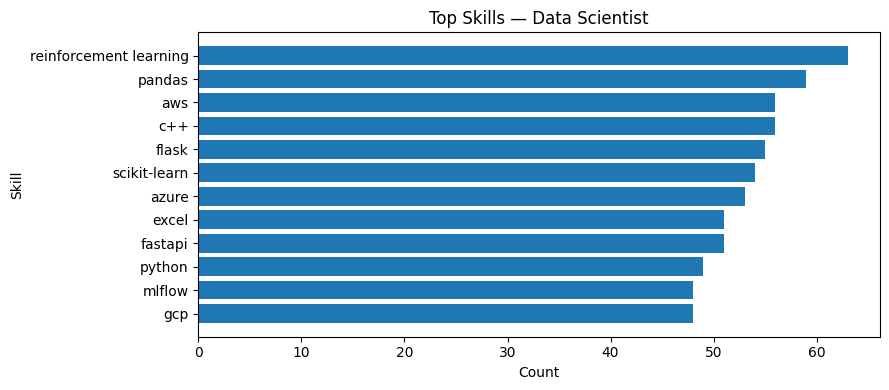

In [ ]:
# Visual: Top 12 skills (barh)
# Data Analyst
plt.figure(figsize=(9,4))
a = top_da.iloc[::-1]
plt.barh(a["skill"], a["count"])
plt.title("Top Skills — Data Analyst")
plt.xlabel("Count"); plt.ylabel("Skill")
plt.tight_layout(); plt.show()

# Data Scientist
plt.figure(figsize=(9,4))
s = top_ds.iloc[::-1]
plt.barh(s["skill"], s["count"])
plt.title("Top Skills — Data Scientist")
plt.xlabel("Count"); plt.ylabel("Skill")
plt.tight_layout(); plt.show()

Insight:
- Data Analyst (DA) – 10 teratas: tensorflow, excel, reinforcement learning, mlflow, pytorch, power bi, gcp, pandas, keras, scikit-learn, sql, aws.
- Data Scientist (DS) – 10 teratas: reinforcement learning, pandas, aws, c++, flask, scikit-learn, azure, excel, fastapi, python, mlflow, gcp.

- Overlap inti DA & DS: pandas, scikit-learn, excel, cloud (AWS/GCP/Azure), dan MLOps (mlflow). Artinya lowongan pekerjaan tersebut mengharapkan data wrangling, modeling klasik, serta exposure cloud/MLOps di kedua role.

- Produksi/model serving (lebih DS): flask, fastapi, c++, python menonjol ⇒ DS sering diminta membangun/menyajikan model ke production (API/service, kinerja, low-latency).

- Visualisasi/BI (lebih DA): power bi & excel tinggi ⇒ DA di iklan ini banyak menyentuh dashboarding & reporting selain analisis.

- DL stack muncul di DA (tensorflow/keras/pytorch) jadi ada dua kemungkinan:
Banyak role bertitel “Data Analyst” tetapi cakupan kerja ML/DL (labeling job title variatif), atau Perusahaan mulai mencari analyst yang paham AI tools untuk kolaborasi dengan tim ML.

## 5. Skill premium

In [ ]:
# Skill premium (median gaji dengan skill vs baseline role)
def skill_premium(role, min_occ=20):
    sub = df_da_ds[df_da_ds["role"]==role].copy()
    base = sub["salary_mid_usd"].median()
    cnt = Counter([t for row in sub["skills_list"] for t in row])
    rows=[]
    for sk, n in cnt.items():
        if n < min_occ:
            continue
        has = sub["skills_list"].apply(lambda lst: sk in lst)
        med = sub.loc[has, "salary_mid_usd"].median()
        rows.append((sk, n, med, med-base))
    prem = (pd.DataFrame(rows, columns=["skill","n","median_with_skill","premium_vs_role"])
              .sort_values("premium_vs_role", ascending=False))
    return base, prem

base_da, prem_da = skill_premium("Data Analyst", min_occ=20)
base_ds, prem_ds = skill_premium("Data Scientist", min_occ=20)

print("Baseline median DA:", round(base_da)); display(prem_da.head(10))
print("Baseline median DS:", round(base_ds)); display(prem_ds.head(10))

Baseline median DA: 124758


,skill,n,median_with_skill,premium_vs_role
11,keras,57,"134,557.50","9,799.00"
10,hugging face,51,"134,407.50","9,649.00"
0,numpy,53,"133,540.00","8,781.50"
16,aws,54,"133,044.75","8,286.25"
19,mlflow,65,"133,033.00","8,274.50"
3,scikit-learn,56,"131,487.50","6,729.00"
2,pytorch,63,"130,348.00","5,589.50"
8,r,45,"130,050.00","5,291.50"
21,tensorflow,71,"130,050.00","5,291.50"
1,reinforcement learning,67,"129,663.50","4,905.00"


Baseline median DS: 123278


,skill,n,median_with_skill,premium_vs_role
8,azure,53,"135,912.00","12,633.75"
21,tensorflow,43,"135,069.50","11,791.25"
4,flask,55,"132,820.50","9,542.25"
13,pytorch,43,"131,594.00","8,315.75"
9,power bi,44,"130,921.25","7,643.00"
6,reinforcement learning,63,"128,609.50","5,331.25"
20,numpy,45,"128,120.00","4,841.75"
17,gcp,48,"127,550.75","4,272.50"
11,scikit-learn,54,"126,618.25","3,340.00"
7,aws,56,"125,935.00","2,656.75"


Insight:
1. Cross-over skill dihargai

- DA dengan DL stack (Keras/HF/PyTorch) dan MLOps (MLflow) mendapat premium +4–8%: banyak role “DA” ternyata bersinggungan dengan ML.

- DS dengan serving/production (Flask) dan cloud (Azure) mendapat premium +7–10%: employer butuh end-to-end delivery, bukan sekadar modeling.

2. Cloud matters, tapi preferensi berbeda

- DA → AWS (premium +6.6%) relatif kuat.

- DS → Azure paling tinggi (+10.3%), GCP sedang (+3.5%), AWS lebih rendah (+2.2%). Ini bisa merefleksikan stack perusahaan/industri yang memasang lowongan.

3. Premium ≠ kausal

- Angka di atas bersifat korelasi; bisa dipengaruhi level pengalaman, lokasi, industri, ukuran perusahaan.

## 6. Top companies & locations untuk DA/DS

In [ ]:
# Top companies & locations untuk DA/DS
top_company = (df_da_ds.groupby(["role","company_name"])
                 .size().rename("count").reset_index()
                 .sort_values(["role","count"], ascending=[True,False]))
display(top_company.groupby("role").head(10))

,role,company_name,count
234,Data Analyst,Taylor PLC,2
0,Data Analyst,"Abbott, Nielsen and Young",1
1,Data Analyst,Acevedo-Frazier,1
2,Data Analyst,"Adams, Mitchell and Stanley",1
3,Data Analyst,Alexander PLC,1
4,Data Analyst,"Allen, Hernandez and Salazar",1
5,Data Analyst,Allen-Patterson,1
6,Data Analyst,"Allison, Jensen and Wilson",1
7,Data Analyst,Alvarez-Butler,1
8,Data Analyst,Anderson and Sons,1


In [ ]:
# # Top locations untuk DA/DS
top_loc = (df_da_ds.groupby(["role","location"])
             .size().rename("count").reset_index()
             .sort_values(["role","count"], ascending=[True,False]))
display(top_loc.groupby("role").head(10))

,role,location,count
0,Data Analyst,"Adamtown, CH",1
1,Data Analyst,"Alexiston, UY",1
2,Data Analyst,"Allenton, UG",1
3,Data Analyst,"Amandabury, GW",1
4,Data Analyst,"Amytown, TD",1
5,Data Analyst,"Andreatown, SR",1
6,Data Analyst,"Anthonyberg, DM",1
7,Data Analyst,"Anthonyland, GQ",1
8,Data Analyst,"Bakerland, NG",1
9,Data Analyst,"Barnesfurt, SV",1


In [ ]:
# Ekstrak negara dari kolom `location`
# Format lokasi: "NamaKota, CC" -> ambil CC (2 huruf) sebagai country code
df["country"] = (
    df["location"]
    .astype(str)
    .str.rsplit(",", n=1).str[-1]      # ambil bagian setelah koma terakhir
    .str.strip()
)

# Top companies per role
topN = 10

top_companies = (
    df.groupby(["role", "company_name"])
      .size()
      .rename("count")
      .sort_values(ascending=False)
      .reset_index()
)

# ambil Top-N per role
top_companies_per_role = (
    top_companies
    .groupby("role", group_keys=False)
    .head(topN)
)

print("Top companies per role:")
top_companies_per_role.head(10)

Top companies per role:


,role,company_name,count
0,Data Scientist,Moore LLC,2
1,Data Analyst,Taylor PLC,2
2,Data Scientist,"Hall, Savage and Walker",1
3,Data Scientist,"Hall, Barber and Young",1
4,Data Scientist,Hall LLC,1
5,Data Scientist,Hall Group,1
6,Data Scientist,Gutierrez Group,1
7,Data Scientist,"Gross, Rivera and Gutierrez",1
8,Data Scientist,Green-Freeman,1
9,Data Scientist,Graves and Sons,1


In [ ]:
# Top countries per role
top_countries = (
    df.groupby(["role", "country"])
      .size()
      .rename("count")
      .sort_values(ascending=False)
      .reset_index()
)

top_countries_per_role = (
    top_countries
    .groupby("role", group_keys=False)
    .head(topN)
)

print("Top countries per role:")
top_countries_per_role.head(10)

Top countries per role:


,role,country,count
0,Data Analyst,PG,6
1,Data Analyst,KP,5
2,Data Scientist,GT,4
3,Data Scientist,PW,4
4,Data Scientist,FJ,4
5,Data Analyst,UY,4
6,Data Scientist,TO,4
7,Data Analyst,TT,4
8,Data Analyst,SY,4
9,Data Analyst,ME,4


- Top companies per role: mayoritas perusahaan hanya muncul 1 lowongan; perusahaan “teratas” untuk DA/DS pun hanya 2 lowongan.

- Top countries per role: untuk Data Analyst negara terbanyak yaitu 6 (PG), lalu 5 (KP) dan lainnya 4; untuk Data Scientist banyak negara di 4 Artinya sebaran sangat rata & tipis (tidak ada negara/perusahaan dominan).

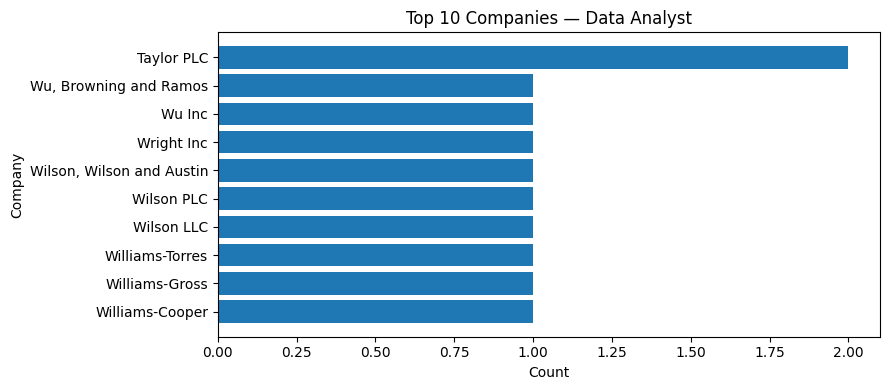

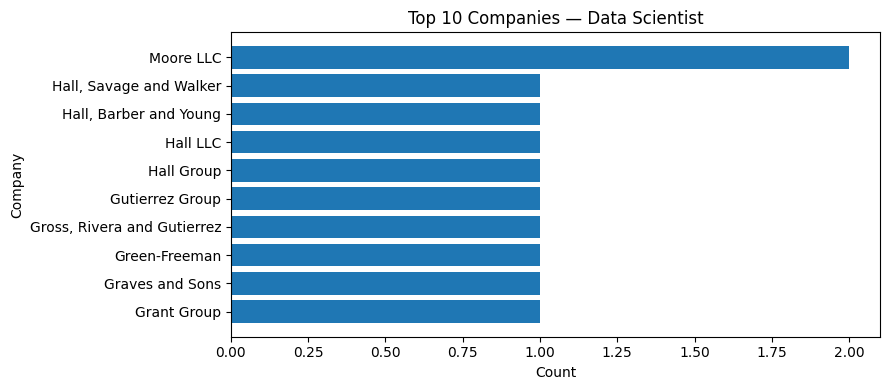

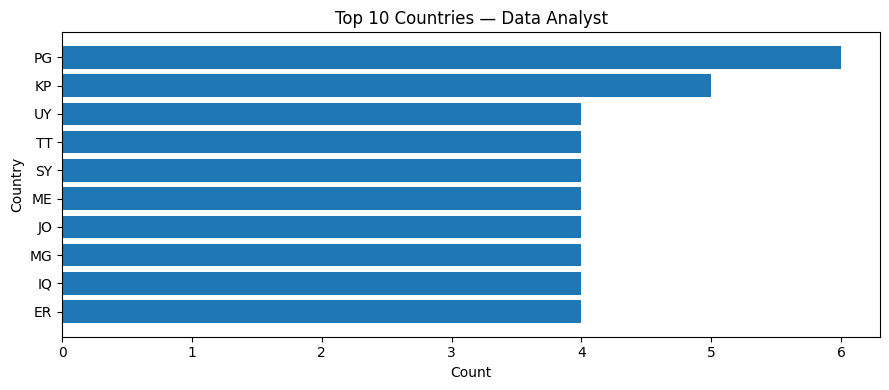

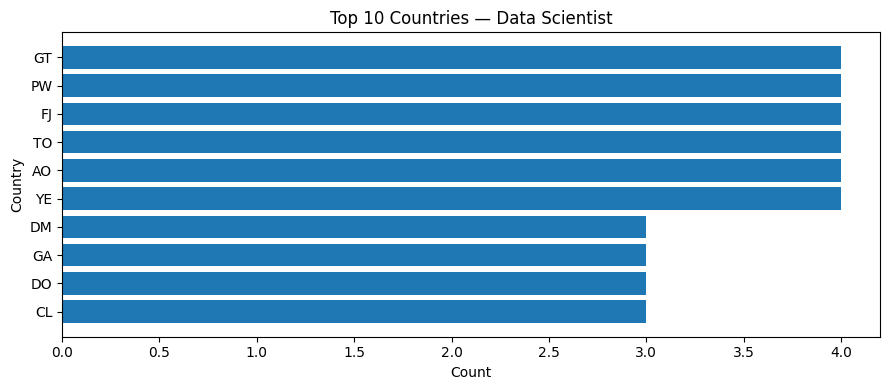

In [ ]:
# Plot Top companies per role
roles = ["Data Analyst", "Data Scientist"]

for r in roles:
    sub = top_companies_per_role[top_companies_per_role["role"] == r]
    plt.figure(figsize=(9,4))
    plt.barh(sub["company_name"].iloc[::-1], sub["count"].iloc[::-1])
    plt.title(f"Top {topN} Companies — {r}")
    plt.xlabel("Count")
    plt.ylabel("Company")
    plt.tight_layout()
    plt.show()

# Plot Top countries per role
for r in roles:
    sub = top_countries_per_role[top_countries_per_role["role"] == r]
    plt.figure(figsize=(9,4))
    plt.barh(sub["country"].iloc[::-1], sub["count"].iloc[::-1])
    plt.title(f"Top {topN} Countries — {r}")
    plt.xlabel("Count")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

Insight:
1. Tidak ada employer dominan. Dengan count per perusahaan ≤2, ranking “Top 10 Perusahaan” tidak stabil sehingga satu posting baru saja bisa mengubah peringkat.

2. Sebaran lintas negara cukup merata dan volume per negara kecil (≤6). Ini tanda bahwa dataset ini lebih cocok untuk melihat pola global (share per role per negara) dibandingkan menyimpulkan “negara X paling hot”.

3. Implikasi untuk pencari kerja (DA/DS):

- Karena posting tersebar tipis, strategi terbaik adalah melamar ke banyak perusahaan dan jangan membatasi negara—gunakan filter lokasi fleksibel (remote/hybrid).

- Gunakan skill-specific targeting (lihat bagian Top Skills & Skill Premium) ketimbang “company targeting” karena secara data perusahaan tidak ada yang menonjol.

## 7. Analisis inferensial: proporsi high-salary antara DS vs DA

In [ ]:
# Batas high-salary: kuartil atas (P75) data keseluruhan
P75 = df["salary_mid_usd"].quantile(0.75)
df_da_ds["high_salary"] = (df_da_ds["salary_mid_usd"] >= P75).astype(int)

from statsmodels.stats.proportion import proportions_ztest

da = df_da_ds[df_da_ds["role"]=="Data Analyst"]
ds = df_da_ds[df_da_ds["role"]=="Data Scientist"]

count = [da["high_salary"].sum(), ds["high_salary"].sum()]
nobs  = [len(da), len(ds)]
z, p  = proportions_ztest(count, nobs)

p_da, p_ds = da["high_salary"].mean(), ds["high_salary"].mean()
delta = p_ds - p_da
se = np.sqrt(p_da*(1-p_da)/len(da) + p_ds*(1-p_ds)/len(ds))
ci = (delta - 1.96*se, delta + 1.96*se)

print("=== High-salary (>=P75) DS vs DA ===")
print(f"DA: {p_da:.3f} | DS: {p_ds:.3f} | Δ={delta*100:.2f} pp")
print(f"z={z:.2f}, p={p:.3f}, 95% CI: [{ci[0]*100:.2f}, {ci[1]*100:.2f}] pp")

=== High-salary (>=P75) DS vs DA ===
DA: 0.295 | DS: 0.244 | Δ=-5.15 pp
z=1.30, p=0.192, 95% CI: [-12.85, 2.55] pp


- DA (proporsi high-salary ≥ P75): 0.295

- DS (proporsi high-salary ≥ P75): 0.244

- Selisih (DS − DA): −5.15 pp

- z = 1.30, p-value = 0.192

- 95% CI selisih: [−12.85, 2.55] pp

Insight:
- Kesimpulan statistik: dengan α=5%, tidak ada perbedaan signifikan proporsi lowongan bergaji tinggi antara Data Scientist dan Data Analyst. Sehingga gagal menolak H0 (p=0.192).

- Interpretasi: selisih −5.15 pp kecil dan rentang CI melintasi nol, sehingga perbedaan yang terlihat bisa disebabkan variasi sampel. Untuk pencari kerja, memilih DA vs DS saja tidak serta-merta meningkatkan peluang menemukan lowongan “high-salary”; faktor lain (level pengalaman, skill/stack, ukuran perusahaan) justru kemungkinan lebih menentukan supaya sejalan dengan analisis skill premium dan breakdown pengalaman sebelumnya.

In [ ]:
p_da, p_ds = 0.295, 0.244
cohens_h = 2*np.arcsin(np.sqrt(p_ds)) - 2*np.arcsin(np.sqrt(p_da))
print("Cohen's h:", abs(cohens_h))

Cohen's h: 0.11505744494289605


h = 0.1 → efek kecil.

## Save CSV terbaru

In [ ]:
# pilih kolom yang mau diekspor ke tableau
cols_keep = [
    "job_id","role","experience_norm","job_title_std",
    "salary_mid_usd","skills_required","company_name",
    "location","posted_date","month_dt"
]
df_clean = df[cols_keep].copy()

# rapikan kolom tanggal
df_clean["posted_date"] = pd.to_datetime(df_clean["posted_date"], errors="coerce")
df_clean["month_dt"]   = pd.to_datetime(df_clean["month_dt"], errors="coerce").dt.to_period("M").dt.to_timestamp()

# simpan ke /content
df_clean.to_csv("/content/ai_job_market_clean.csv", index=False)

# VI. Pengambilan Kesimpulan

## Jawaban singkat dari tujuan:

Untuk pencari kerja Data Analyst (DA) dan Data Scientist (DS), pasar lowongan pada dataset ini stabil sepanjang periode observasi sehingga peluang gaji tinggi tidak berbeda signifikan antara DA dan DS. Peluang terbaik datang dari: (1) level pengalaman, (2) berbagai skill tertentu, dan (3) menarget perusahaan/negara yang relevan.

## Benang merah temuan

1. Volume lowongan: berfluktuasi bulanan (puncak Jan 2024, lembah Sep 2023) namun tren linear tidak signifikan → pasar cenderung stabil.

2. Gaji keseluruhan: median $123k, rentang lebar (P10–P90 = 76k usd – 169k usd, IQR = 57k usd) → negosiasi & variasi per iklan besar.

3. Gaji per pengalaman: median relatif naik dari Mid → Senior (±121k usd → ±125k usd) dengan band P10–P90 lebar; pengalaman tetap berharga.

3. DA vs DS (uji proporsi high-salary ≥ P75): DA 29.5% vs DS 24.4%, selisih −5.15 pp, p=0.192 sehingga tidak signifikan (efek kecil).

- Implikasi: memilih DA/DS saja tidak otomatis mengubah peluang gaji tinggi tetapi skill & pengalaman lebih menentukan.

4. Skill yang sering muncul

- DA: Python-ecosystem & ML toolset (mis. tensorflow, pytorch, pandas, scikit-learn), juga Excel/Power BI & cloud.

- DS: Python/ML stack, cloud (AWS/Azure/GCP), MLOps/Web (mlflow, flask, fastapi), serta C++ untuk komputasi.

5. Skill premium (median uplift)

- DA: Keras, Hugging Face, NumPy, AWS, MLflow (±+5k usd – 10k usd).

- DS: Azure, TensorFlow, Flask, PyTorch, Power BI (±+7k usd – 13k usd).
- Implikasi: menambah satu atau dua skill “bernilai tambah” meningkatkan posisi diterimanya.

6. Penyebaran perusahaan/negara: mayoritas perusahaan hanya memposting 1 lowongan, negara tersebar → perlu strategi pencarian luas (banyak target & alert).

## Rekomendasi

1. Strategi skill

- DA: kuatkan SQL/Excel/BI, lalu tambah pandas, scikit-learn, & satu ML/MLOps (mis. MLflow).

- DS: kuasai Python + scikit-learn/PyTorch/TensorFlow, tambah satu cloud (prioritas Azure dari sisi premium), serta Flask/FastAPI untuk deploy.

2. Pengalaman

- Tiga portofolio terukur (mis. forecasting/segmentation/dashboard ML) dengan repo + dashboard + API sederhana.

- Tunjukkan impact & metrik (MAE/AUC, penghematan biaya, dll.).

3. Target & timing

- Gunakan alert multi-platform; karena posting menyebar dan fluktuatif, konsistensi lamaran lebih penting daripada menunggu “musim”.

4. Negosiasi gaji

- Gunakan band P10–P90 sebagai jangkar; soroti skill premium di atas saat negosiasi.